# Barren Plateau Identification

In this notebook, we'll analyze the trainability of our quantum circuit ansatze. Given an ansatz $U(\theta_{\mu})$ and a cost function $C(\theta_\mu)$, we identify a barren plateau if the variance of the gradient of the cost function exponentially decays with system size. That is

$$\text{Var}\left[\partial_{\mu}C\left(\vec{\theta}\right)\right] \sim e^{-\nu N}$$

In this project, we take the mean variance over all parameters $\theta_\mu$, so that we expect a barren plateau when 
$$\sum_{\mu}\text{Var}\left[\partial_{\mu}C\left(\vec{\theta}\right)\right] \sim f(N) e^{-\nu N}$$

where $f(N)$ is some polynomial function of system size.


In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from hea import hea_circuit
from ttn import ttn_circuit
from mera import mera_circuit, get_num_mera_gates
from hamiltonians import tfi_chain

## MERA

In [5]:
num_samples = 10
qubits = [2, 3, 4, 5, 6, 7, 8]
mera_variances = []

np.random.seed(1)
h = 1.0

for num_qubits in qubits:
    H = tfi_chain(num_qubits, h)
    grad_vals = []
    for i in range(num_samples):
        print(f"num_qubits {num_qubits}, step {i}")
        dev = qml.device("default.qubit", wires=num_qubits)
        ansatz = mera_circuit(num_qubits)
        cost_fn = qml.ExpvalCost(ansatz, H, dev, optimize=True)
        grad = qml.grad(cost_fn)


        num_params_per_gate = 15
        num_gates           = get_num_mera_gates(num_qubits)
        num_params          = num_params_per_gate * num_gates
        params = np.pi*(np.random.rand(num_params) - 1.0)
        
        gradient = np.array(grad(params)[0])
        grad_vals.append(gradient)
    mera_variances.append(np.mean(np.var(grad_vals, axis=0)))

# Fit the semilog plot to a straight line
mera_p = np.polyfit(np.log(qubits), np.log(mera_variances), 1)




num_qubits 2, step 0
num_qubits 2, step 1
num_qubits 2, step 2
num_qubits 2, step 3
num_qubits 2, step 4
num_qubits 2, step 5
num_qubits 2, step 6
num_qubits 2, step 7
num_qubits 2, step 8
num_qubits 2, step 9
num_qubits 3, step 0
num_qubits 3, step 1
num_qubits 3, step 2
num_qubits 3, step 3
num_qubits 3, step 4
num_qubits 3, step 5
num_qubits 3, step 6
num_qubits 3, step 7
num_qubits 3, step 8
num_qubits 3, step 9
num_qubits 4, step 0
num_qubits 4, step 1
num_qubits 4, step 2
num_qubits 4, step 3
num_qubits 4, step 4
num_qubits 4, step 5
num_qubits 4, step 6
num_qubits 4, step 7
num_qubits 4, step 8
num_qubits 4, step 9
num_qubits 5, step 0
num_qubits 5, step 1
num_qubits 5, step 2
num_qubits 5, step 3
num_qubits 5, step 4
num_qubits 5, step 5
num_qubits 5, step 6
num_qubits 5, step 7
num_qubits 5, step 8
num_qubits 5, step 9
num_qubits 6, step 0
num_qubits 6, step 1
num_qubits 6, step 2
num_qubits 6, step 3
num_qubits 6, step 4
num_qubits 6, step 5
num_qubits 6, step 6
num_qubits 6,

## TTN

In [6]:
num_samples = 10
qubits = [2, 3, 4, 5, 6, 7, 8]
ttn_variances = []

np.random.seed(1)
h = 1.0

for num_qubits in qubits:
    H = tfi_chain(num_qubits, h)
    grad_vals = []
    for i in range(num_samples):
        print(f"num_qubits {num_qubits}, step {i}")
        dev = qml.device("default.qubit", wires=num_qubits)
        ansatz = ttn_circuit(num_qubits)
        cost_fn = qml.ExpvalCost(ansatz, H, dev, optimize=True)
        grad = qml.grad(cost_fn)


        num_params_per_gate = 15
        num_gates           = num_qubits - 1
        num_params          = num_params_per_gate * num_gates
        params = np.pi*(np.random.rand(num_params) - 1.0)
        
        gradient = np.array(grad(params)[0])
        grad_vals.append(gradient)
    ttn_variances.append(np.mean(np.var(grad_vals, axis=0)))

# Fit the semilog plot to a straight line
ttn_p = np.polyfit(np.log(qubits), np.log(ttn_variances), 1)

num_qubits 2, step 0
num_qubits 2, step 1
num_qubits 2, step 2
num_qubits 2, step 3
num_qubits 2, step 4
num_qubits 2, step 5
num_qubits 2, step 6
num_qubits 2, step 7
num_qubits 2, step 8
num_qubits 2, step 9
num_qubits 3, step 0
num_qubits 3, step 1
num_qubits 3, step 2
num_qubits 3, step 3
num_qubits 3, step 4
num_qubits 3, step 5
num_qubits 3, step 6
num_qubits 3, step 7
num_qubits 3, step 8
num_qubits 3, step 9
num_qubits 4, step 0
num_qubits 4, step 1
num_qubits 4, step 2
num_qubits 4, step 3
num_qubits 4, step 4
num_qubits 4, step 5
num_qubits 4, step 6
num_qubits 4, step 7
num_qubits 4, step 8
num_qubits 4, step 9
num_qubits 5, step 0
num_qubits 5, step 1
num_qubits 5, step 2
num_qubits 5, step 3
num_qubits 5, step 4
num_qubits 5, step 5
num_qubits 5, step 6
num_qubits 5, step 7
num_qubits 5, step 8
num_qubits 5, step 9
num_qubits 6, step 0
num_qubits 6, step 1
num_qubits 6, step 2
num_qubits 6, step 3
num_qubits 6, step 4
num_qubits 6, step 5
num_qubits 6, step 6
num_qubits 6,

## HEA

In [7]:
num_sammples = 10
qubits = [2, 3, 4, 5, 6, 7, 8]
hea_variances = []

np.random.seed(1)
h = 1.0

for num_qubits in qubits:
    H = tfi_chain(num_qubits, h)
    grad_vals = []
    for i in range(num_samples):
        print(f"num_qubits {num_qubits}, step {i}")
        dev = qml.device("default.qubit", wires=num_qubits)
        ansatz = hea_circuit(num_qubits)
        cost_fn = qml.ExpvalCost(ansatz, H, dev)
        grad = qml.grad(cost_fn)


        hea_depth           = num_qubits                 # how many times we'll repeat the circuit
        num_gates           = hea_depth * num_qubits     # The number of rotation gates in the HEA.
        num_params          = 3*hea_depth*num_qubits     # The total number of parameters in the HEA.
        params = np.random.uniform(low=-np.pi / 2, high=np.pi / 2, size=(num_params, 3))        
        
        gradient = np.array(grad(params)[0])
        grad_vals.append(gradient)
    hea_variances.append(np.mean(np.var(grad_vals, axis=0)))

# Fit the semilog plot to a straight line
hea_p = np.polyfit(qubits, np.log(hea_variances), 1)

num_qubits 2, step 0
num_qubits 2, step 1
num_qubits 2, step 2
num_qubits 2, step 3
num_qubits 2, step 4
num_qubits 2, step 5
num_qubits 2, step 6
num_qubits 2, step 7
num_qubits 2, step 8
num_qubits 2, step 9
num_qubits 3, step 0
num_qubits 3, step 1
num_qubits 3, step 2
num_qubits 3, step 3
num_qubits 3, step 4
num_qubits 3, step 5
num_qubits 3, step 6
num_qubits 3, step 7
num_qubits 3, step 8
num_qubits 3, step 9
num_qubits 4, step 0
num_qubits 4, step 1
num_qubits 4, step 2
num_qubits 4, step 3
num_qubits 4, step 4
num_qubits 4, step 5
num_qubits 4, step 6
num_qubits 4, step 7
num_qubits 4, step 8
num_qubits 4, step 9
num_qubits 5, step 0
num_qubits 5, step 1
num_qubits 5, step 2
num_qubits 5, step 3
num_qubits 5, step 4
num_qubits 5, step 5
num_qubits 5, step 6
num_qubits 5, step 7
num_qubits 5, step 8
num_qubits 5, step 9
num_qubits 6, step 0
num_qubits 6, step 1
num_qubits 6, step 2
num_qubits 6, step 3
num_qubits 6, step 4
num_qubits 6, step 5
num_qubits 6, step 6
num_qubits 6,

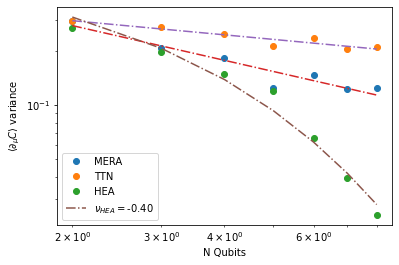

In [25]:
# Plot the straight line fit to the semilog
qubits = np.array(qubits)
plt.loglog(qubits, mera_variances, "o", label="MERA")
plt.loglog(qubits, ttn_variances, "o", label="TTN")
plt.loglog(qubits, hea_variances, "o", label="HEA")

plt.loglog(qubits, np.exp(mera_p[0] * np.log(qubits) + mera_p[1]), "-.")#, label=r"$\nu_{MERA}=$" + "{:3.2f}".format(mera_p[0]))
plt.loglog(qubits, np.exp(ttn_p[0] * np.log(qubits) + ttn_p[1]), "-.")#, label=r"$\nu_{TTN}=$" + "{:3.2f}".format(ttn_p[0]))
plt.loglog(qubits, np.exp(hea_p[0] * qubits + hea_p[1]), "-.", label=r"$\nu_{HEA}=$" + "{:3.2f}".format(hea_p[0]))

plt.xlabel(r"N Qubits")
plt.ylabel(r"$\langle \partial_{\mu} C\rangle$ variance")
plt.legend()
plt.show()


Note that for MERA and TTN, there is a polynomial relationship between the number of qubits and the variance of the  gradient of the cost function, while the relationship is an exponential for the HEA ansatz!